In [ ]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
#from keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50




from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import SGD

from keras.optimizers import gradient_descent_v2
from keras.optimizers import adam_v2
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
#from keras.utils import to_categorical
#from tensorflow.keras.utils import 
from keras.utils.np_utils import to_categorical


import tensorflow as tf
import random

In [ ]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


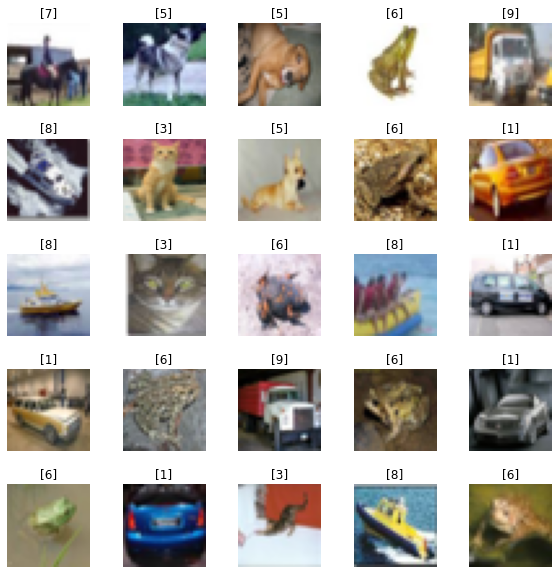

In [ ]:
W_grid=5
L_grid=5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) 
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index]) 
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
#Train-validation-test split
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train, train_size =.3)

In [ ]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((15000, 32, 32, 3), (15000, 1))
((35000, 32, 32, 3), (35000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))



((15000, 32, 32, 3), (15000, 10))
((35000, 32, 32, 3), (35000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
base_model_VGG19 = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_vgg19 = Sequential()
model_vgg19.add(base_model_VGG19) 
model_vgg19.add(Flatten()) 
model_vgg19.add(Dense(1024,activation=('relu'),input_dim=512))
model_vgg19.add(Dense(512,activation=('relu'))) 
model_vgg19.add(Dense(256,activation=('relu'))) 
#model_vgg19.add(Dropout(.3))
model_vgg19.add(Dense(128,activation=('relu')))
#model_vgg19.add(Dropout(.2))
model_vgg19.add(Dense(10,activation=('softmax')))

In [ ]:
#VGG19 Model Summary
model_vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [ ]:
#Defining the hyperparameters
batch_size= 100
epochs=5
learn_rate=.001
sgd=gradient_descent_v2.SGD(lr=learn_rate,momentum=.9,nesterov=False)

#Compiling the VGG19 model
model_vgg19.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_vgg19.fit_generator(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs=epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps = 250, verbose = 1)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


150/150 [==============================] - 33s 129ms/step - loss: 2.3644 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0989
Epoch 2/5
150/150 [==============================] - 19s 127ms/step - loss: 2.3026 - accuracy: 0.1039 - val_loss: 2.3026 - val_accuracy: 0.0991
Epoch 3/5
150/150 [==============================] - 19s 127ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 4/5
150/150 [==============================] - 19s 129ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3027 - val_accuracy: 0.0987
Epoch 5/5
150/150 [==============================] - 19s 128ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3027 - val_accuracy: 0.0995


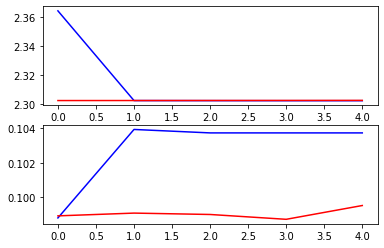

In [ ]:
#Plotting the training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(model_vgg19.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_vgg19.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(model_vgg19.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model_vgg19.history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

#We will make the predictions through the trained VGG19 model using the test image dataset.

#Making prediction
y_pred1 = model_vgg19.predict_classes(x_test)
y_true = np.argmax(y_test,axis=1)

#Now, we will plot the non-normalized confusion matrix to visualize the exact number of classifications and normalized confusion matrix to visualize the percentage of classifications. 

#Plotting the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred1, classes = class_names,  title = 'Non-Normalized VGG19 Confusion Matrix')

AttributeError: ignored